### Individual lines


Checking the lines for some sources

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.constants import c
from astropy.convolution import Gaussian1DKernel, convolve

import sys , os
sys.path.append("../../src/lines")

import lineTools as lt


### working dir. and files
wd = "/home/stephane/Science/RadioGalaxy/ALMA/absorptions/analysis/a/"
os.chdir(wd)

datadir   = "dataSpecAll/"
dbline    = "lineAll.db"
transfile = "splatalogue.csv"
dirplot   = "plots/"


In [27]:
def plotSource(lines, vel, amp , vx):
    "Overplot the different candidate lines"
#    
    plt.figure(figsize=(8.0,4.5))
    style = ["k-","r--", "b.-"]
    plt.xlim(vx[0],vx[1])

    
    for lindex in range(len(lines)):
        v = vel[lindex]
        a = amp[lindex]
        s = style[lindex]
        plt.step(v, a,  s , linewidth = 1.0 , label = lines[lindex][0])
    
    plt.xlabel ("v (km/s)")
    plt.ylabel(r"$S^*$")
    plt.legend()
    
    plt.show()

In [28]:
def getData(dataid, z, freqtrans):
    al = lt.analysisLines(dbline)
    cmdsql = "select filedata FROM dataset WHERE dataid = '%d'"%(dataid)
    resdb = al.query(cmdsql)
    
    pl = lt.plotLines("fake", "fake", "fake")
    datafile = datadir + resdb[0][0]
    
    freq , amp = pl.extractData(datafile)
    amp = amp / np.mean(amp)
    freq = freq * (1. + z)
    dv = c.value * 1e-3 *  (freq - freqtrans) / freqtrans
    
    return(dv , amp)
    

### Source J2148

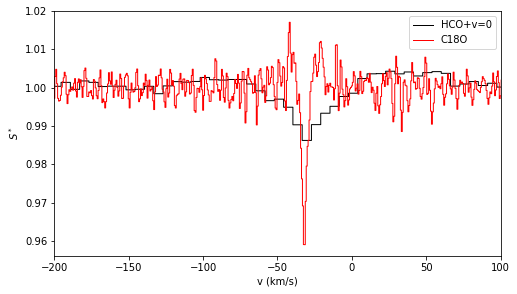

In [29]:
source = "J2148+0657"
z = 0.8983000
lines = []
line1 = ("HCO+v=0", 178.37506 , 4762)
lines.append(line1)
line1 = ("C18O", 439.08877 , 2041)
lines.append(line1)


velline = []
ampline = []

for l in lines:
    dv , amp = getData(l[2], z , l[1])
    amp = amp / np.mean(amp) 
    ampline.append(amp)
    velline.append(dv)
    
plotSource(lines, velline, ampline, [-200., 100.])


In [30]:
## fine tuning..

al = lt.analysisLines(dbline)
resLines = al.findSpeciesFineTuningSource(source , z, -32., -31., flag = False, outputline = 10)

------
Source: J2148+0657
Redshift: 0.898300
Frequency redshifted: 93.959127
Frequency at rest: 178.362611
Frequency offset:
0.0184424124104 GHz 0.0190385161227 GHz
    Species        Chemical Name    ... Lovas/AST Intensity    EU_K   
--------------- ------------------- ... ------------------- ----------
        HCO+v=0           Formylium ...                  --   12.84094
        HCO+v=0           Formylium ...                  --   12.84094
        HCO+v=0           Formylium ...                  --   12.84094
            ...                 ... ...                 ...        ...
        HOCH2CN Hydroxyacetonitrile ...                  -- 1896.43979
cis-CH2OHCHOv=3      Glycolaldehyde ...                  -- 2098.95534
cis-CH2OHCHOv=3      Glycolaldehyde ...                  -- 2098.95534
Length = 96 rows
------
Source: J2148+0657
Redshift: 0.898300
Frequency redshifted: 92.789206
Frequency at rest: 176.141750
Frequency offset:
0.0182096972833 GHz 0.0188014602822 GHz
     Species  

    Species        Chemical Name    ... Lovas/AST Intensity    EU_K   
---------------- ------------------ ... ------------------- ----------
          SO2v=0     Sulfur dioxide ...                  --    41.9902
          SO2v=0     Sulfur dioxide ...                  --    41.9902
          SO2v=0     Sulfur dioxide ...                  --   41.99063
             ...                ... ...                 ...        ...
H2NCH2COOH-IIv=1            Glycine ...                  -- 2377.99046
H2NCH2COOH-IIv=1            Glycine ...                  -- 2377.99046
           CH2OO Methylene peroxide ...                  -- 3796.44763
Length = 151 rows
------
Source: J2148+0657
Redshift: 0.898300
Frequency redshifted: 101.970318
Frequency at rest: 193.570255
Frequency offset:
0.0200153402021 GHz 0.0206617877929 GHz
    Species       Chemical Name    ... Lovas/AST Intensity    EU_K   
--------------- ------------------ ... ------------------- ----------
O218O-asym,v2=1              Ozone ..